In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False


In [2]:
x = np.arange(100)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
y = 3*x+2 #线性方程，一元一次
y

array([  2,   5,   8,  11,  14,  17,  20,  23,  26,  29,  32,  35,  38,
        41,  44,  47,  50,  53,  56,  59,  62,  65,  68,  71,  74,  77,
        80,  83,  86,  89,  92,  95,  98, 101, 104, 107, 110, 113, 116,
       119, 122, 125, 128, 131, 134, 137, 140, 143, 146, 149, 152, 155,
       158, 161, 164, 167, 170, 173, 176, 179, 182, 185, 188, 191, 194,
       197, 200, 203, 206, 209, 212, 215, 218, 221, 224, 227, 230, 233,
       236, 239, 242, 245, 248, 251, 254, 257, 260, 263, 266, 269, 272,
       275, 278, 281, 284, 287, 290, 293, 296, 299])

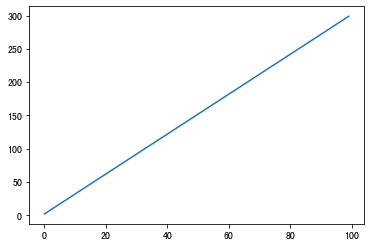

In [7]:
plt.plot(x,y)

In [15]:
path = r'../YCdata/TRD_Index.txt'
TRDindex = pd.read_table(path,sep='\t')
TRDindex.head()

,Indexcd,Trddt,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
0,1,2009-01-05,1,1849.020,1880.716,1844.094,1880.716,0.032904
1,1,2009-01-06,2,1878.827,1938.690,1871.971,1937.145,0.030004
2,1,2009-01-07,3,1938.974,1948.233,1920.515,1924.012,-0.006780
3,1,2009-01-08,4,1890.242,1894.171,1862.263,1878.181,-0.023821
4,1,2009-01-09,5,1875.164,1909.349,1875.164,1904.861,0.014205


In [22]:
SHindex = TRDindex[TRDindex.Indexcd ==1]
SZindex = TRDindex[TRDindex.Indexcd == 399106]
SHret = SHindex.Retindex
SZret = SZindex.Retindex
SHret

0       0.032904
1       0.030004
2      -0.006780
3      -0.023821
4       0.014205
          ...   
1206    0.006426
1207   -0.015788
1208    0.013580
1209   -0.001771
1210    0.008796
Name: Retindex, Length: 1211, dtype: float64

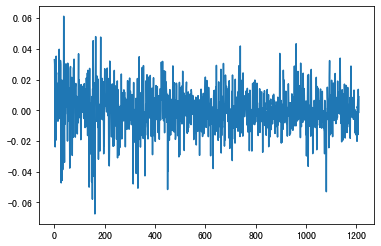

In [18]:
SHret.plot()

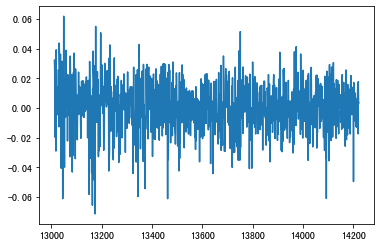

In [19]:
SZret.plot()

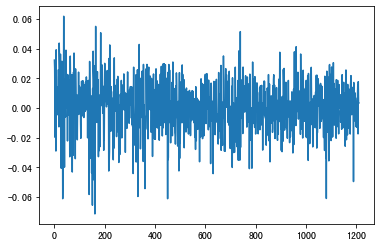

In [23]:
SZret.index = SHret.index #交换索引
SZret.plot()

In [24]:
import statsmodels.api as sm
model =sm.OLS(SHret,sm.add_constant(SZret)).fit() #建立连个涨幅跌幅的关联模型
model.summary()

<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>        <td>Retindex</td>     <th>  R-squared:         </th> <td>   0.825</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.825</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   5698.</td>
</tr>
<tr>
  <th>Date:</th>             <td>Thu, 23 Apr 2020</td> <th>  Prob (F-statistic):</th>  <td>  0.00</td> 
</tr>
<tr>
  <th>Time:</th>                 <td>08:20:36</td>     <th>  Log-Likelihood:    </th> <td>  4520.3</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>  1211</td>      <th>  AIC:               </th> <td>  -9037.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>  1209</td>      <th>  BIC:               </th> <td>  -9026.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>     1</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>        <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>    <td>   -0.0003</td> <td>    0.000</td> <td>   -1.747</td> <td> 0.081</td> <td>   -0.001</td> <td> 3.58e-05</td>
</tr>
<tr>
  <th>Retindex</th> <td>    0.7603</td> <td>    0.010</td> <td>   75.487</td> <td> 0.000</td> <td>    0.741</td> <td>    0.780</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td>154.029</td> <th>  Durbin-Watson:     </th> <td>   1.821</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.000</td>  <th>  Jarque-Bera (JB):  </th> <td> 382.039</td>
</tr>
<tr>
  <th>Skew:</th>          <td> 0.701</td>  <th>  Prob(JB):          </th> <td>1.10e-83</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 5.367</td>  <th>  Cond. No.          </th> <td>    60.5</td>
</tr>
</table><br/><br/>Warnings:<br/>[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [27]:
model.fittedvalues[:5]  #查看线性回归数据


0       0.008691
1       0.010064
2      -0.004379
3      -0.008431
4      -0.002430
          ...   
1206   -0.005190
1207   -0.002192
1208    0.000431
1209   -0.003914
1210    0.006601
Length: 1211, dtype: float64

In [28]:
model.resid

0       0.008691
1       0.010064
2      -0.004379
3      -0.008431
4      -0.002430
          ...   
1206   -0.005190
1207   -0.002192
1208    0.000431
1209   -0.003914
1210    0.006601
Length: 1211, dtype: float64

No handles with labels found to put in legend.


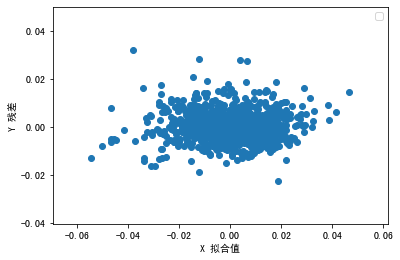

In [26]:
plt.scatter(model.fittedvalues,model.resid)  #model.resid是点到直线距离的平方
plt.xlabel('X 拟合值')
plt.ylabel('Y 残差')
plt.legend()

/Users/dante/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
No handles with labels found to put in legend.


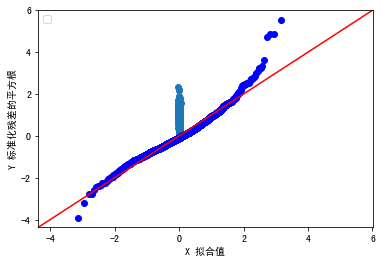

In [30]:
sm.qqplot(model.resid_pearson,stats.norm,line = '45')
plt.scatter(model.fittedvalues,model.resid_pearson**0.5) #model.resid是点到直线的距离
plt.xlabel('X 拟合值')
plt.ylabel('Y 标准化残差的平方根')
plt.legend()

In [37]:
path = r'../YCdata/Penn World Table.xlsx'
pen = pd.read_excel(path,1)  # 索引为1的sheet
pen

,Variable name,Variable definition
0,Identifier variables,NaN
1,countrycode,3-letter ISO country code
2,country,Country name
3,currency_unit,Currency unit
4,year,Year
5,rgdpe,Expenditure-side real GDP at chained PPPs (in ...
6,pl_c,"Price level of household consumption, price l..."
7,pl_i,"Price level of capital formation, price level..."
8,pl_g,"Price level of government consumption, price ..."
9,pl_x,"Price level of exports, price level of USA GDP..."


In [48]:
pen = pd.read_excel(path,2) 
pen

,countrycode,country,currency_unit,year,rgdpe,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
0,AGO,Angola,Kwanza,2007,58131.746094,1.253990,0.738191,1.076301,0.650072,0.764166,0.617699
1,AGO,Angola,Kwanza,2008,67472.859375,1.418632,0.938361,1.352946,0.774891,0.937404,0.777646
2,AGO,Angola,Kwanza,2009,59256.636719,1.681747,0.786687,1.105007,0.829843,1.190549,0.657191
3,AGO,Angola,Kwanza,2010,76151.132812,1.195477,0.843884,1.161518,0.920334,0.961341,0.706732
4,AGO,Angola,Kwanza,2011,82680.945312,1.294905,1.048095,1.460608,1.194767,1.239069,0.868282
...,...,...,...,...,...,...,...,...,...,...,...
830,ZWE,Zimbabwe,Zimbabwe Dollar,2007,45666.082031,0.155326,0.096808,0.030871,0.836226,0.704391,1.322423
831,ZWE,Zimbabwe,Zimbabwe Dollar,2008,35789.878906,0.187243,0.075830,0.017838,0.812021,0.899782,0.920607
832,ZWE,Zimbabwe,Zimbabwe Dollar,2009,49294.878906,0.112196,0.211507,0.153393,0.274833,0.375842,3.617210
833,ZWE,Zimbabwe,Zimbabwe Dollar,2010,51259.152344,0.123692,0.237427,0.168766,0.298547,0.407374,4.071371


In [49]:
model = sm.OLS(np.log(pen.rgdpe),sm.add_constant(pen.iloc[:,-6])).fit()

In [51]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  rgdpe   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.864
Date:                Thu, 23 Apr 2020   Prob (F-statistic):             0.0277
Time:                        08:49:58   Log-Likelihood:                -1811.5
No. Observations:                 835   AIC:                             3627.
Df Residuals:                     833   BIC:                             3636.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4918      0.172     61.144      0.0

In [52]:
model = sm.OLS(np.log(pen.rgdpe),sm.add_constant(pen.iloc[:,-5:-1])).fit()

In [53]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  rgdpe   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     84.00
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           6.58e-60
Time:                        08:51:01   Log-Likelihood:                -1672.0
No. Observations:                 835   AIC:                             3354.
Df Residuals:                     830   BIC:                             3378.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3558      0.502     16.631      0.0